In [3]:
import csv

def read_csv_file(filepath):
    data = []
    with open(filepath, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            data.append(dict(row))
    return data

# Example usage:
filepath = 'example.csv'  # Replace 'example.csv' with your file path
highsample_test4 = read_csv_file('./synthetic_data/highsample_test4.csv')

highsample_test4

[{'': '0', '0': '30.590701841536443', '1': '1.5840137436802424'},
 {'': '1', '0': '35.01343858008301', '1': '1.6701121681233309'},
 {'': '2', '0': '39.815503953851184', '1': '1.9306095262171095'},
 {'': '3', '0': '44.60404140760267', '1': '2.4563975885790295'},
 {'': '4', '0': '48.5690353263127', '1': '3.414563594160868'},
 {'': '5', '0': '50.304049402897874', '1': '5.039333700285836'},
 {'': '6', '0': '48.09418813941689', '1': '7.435368902007727'},
 {'': '7', '0': '41.43365990386955', '1': '10.06311174563305'},
 {'': '8', '0': '32.61235516636722', '1': '11.631371961616678'},
 {'': '9', '0': '24.954234725894075', '1': '11.350625363812792'},
 {'': '10', '0': '19.87983462912622', '1': '9.72995082778405'},
 {'': '11', '0': '17.08726518929163', '1': '7.70373064796086'},
 {'': '12', '0': '15.898091355419673', '1': '5.859780489640587'},
 {'': '13', '0': '15.813754837337802', '1': '4.400356263814972'},
 {'': '14', '0': '16.55031475394306', '1': '3.3260775977694252'},
 {'': '15', '0': '17.9663

In [15]:
import numpy as np
def calculate_mse(array1, array2):
    mse = np.mean((array1 - array2) ** 2)
    return mse

In [21]:
import pandas as pd

# Read CSV file into DataFrame
def csv_to_dataframe(filepath):
    df = pd.read_csv(filepath)
    return df

# Example usage:
test_data_highsample = csv_to_dataframe('./synthetic_data/highsample_test4.csv')
highsample_gpt =  csv_to_dataframe('./raunak_results/highsample_median_gpt.csv')
highsample_arima  =  csv_to_dataframe('./raunak_results/highsample_median_arima.csv')



print(calculate_mse(highsample_gpt['0'].values,test_data_highsample['0'].values))
print(calculate_mse(highsample_arima['0'].values,test_data_highsample['0'].values))

3.122699027679547
11.468559482677117


In [23]:
# Example usage:
test_data_lowsample = csv_to_dataframe('./synthetic_data/lowsample_test5.csv')
lowsample_gpt =  csv_to_dataframe('./raunak_results/lowsample_median_gpt.csv')
lowsample_arima  =  csv_to_dataframe('./raunak_results/lowsample_median_arima.csv')

print(calculate_mse(lowsample_gpt['0'].values,test_data_lowsample['0'].values))
print(calculate_mse(lowsample_arima['0'].values,test_data_lowsample['0'].values))

261.2574637174588
273.4690352367142


In [26]:
# Example usage:
test_data_highsample = csv_to_dataframe('./synthetic_data/highsample_test4.csv')
highsample_gpt2 =  csv_to_dataframe('./raunak_results/highsample2_median_gpt.csv')
highsample_arima2  =  csv_to_dataframe('./raunak_results/highsample2_median_arima.csv')



print(calculate_mse(highsample_gpt2['0'].values,test_data_highsample['1'].values))
print(calculate_mse(highsample_arima2['0'].values,test_data_highsample['1'].values))

0.31040809629211613
834.8555017915667


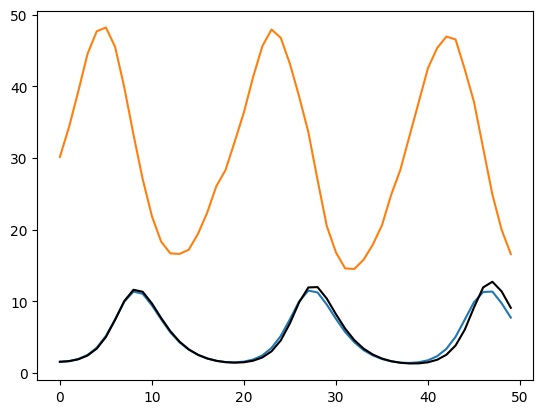

In [28]:
plt.plot(highsample_gpt2['0'].values)
plt.plot(test_data_highsample['1'].values,'k')
plt.plot(highsample_arima2['0'].values)

In [30]:
# Example usage:
test_data_lowsample = csv_to_dataframe('./synthetic_data/lowsample_test5.csv')
lowsample2_gpt =  csv_to_dataframe('./raunak_results/lowsample2_median_gpt.csv')
lowsample2_arima  =  csv_to_dataframe('./raunak_results/lowsample2_median_arima.csv')

print(calculate_mse(lowsample2_gpt['0'].values,test_data_lowsample['1'].values))
print(calculate_mse(lowsample2_arima['0'].values,test_data_lowsample['1'].values))

29.739647429102195
12.000383012622985


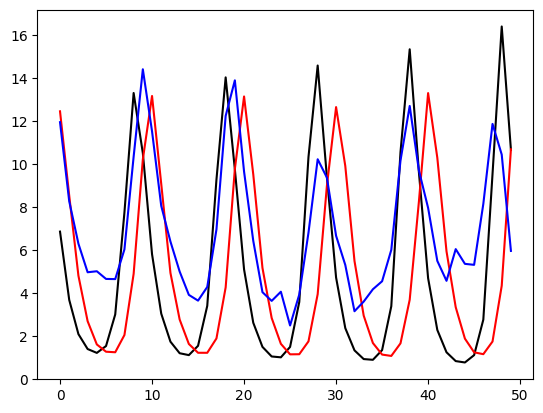

In [69]:
plt.plot(test_data_lowsample['1'],'k')
plt.plot(lowsample2_gpt['0'].values,'r')
plt.plot(lowsample2_arima['0'].values,'b')

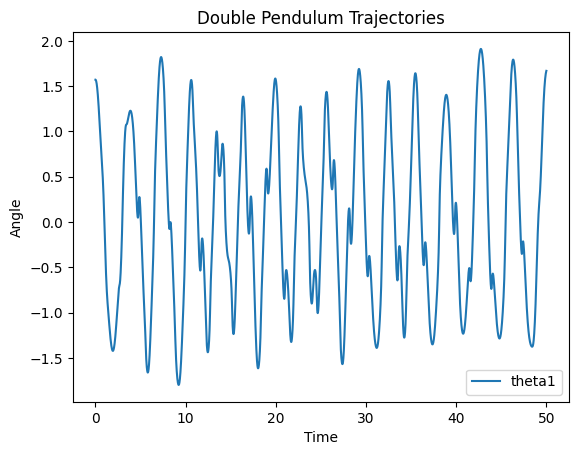

ValueError: x and y must have same first dimension, but have shapes (100,) and (51,)

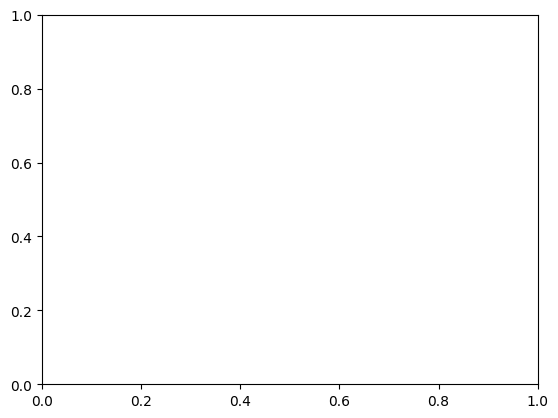

In [42]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def double_pendulum(t, y, l1, l2, m1, m2, g):
    """
    Defines the differential equations for the double pendulum system.

    Parameters:
        t : float
            Time.
        y : array_like
            An array containing the angular positions and velocities [theta1, omega1, theta2, omega2].
        l1, l2 : float
            Lengths of the pendulums.
        m1, m2 : float
            Masses of the pendulum bobs.
        g : float
            Acceleration due to gravity.

    Returns:
        dydt : array_like
            An array containing the derivatives [dtheta1/dt, domega1/dt, dtheta2/dt, domega2/dt].
    """
    theta1, omega1, theta2, omega2 = y

    # Equations of motion
    dydt = [omega1,
            (-g * (2 * m1 + m2) * np.sin(theta1) - m2 * g * np.sin(theta1 - 2 * theta2) - 2 * np.sin(theta1 - theta2) * m2 * (omega2**2 * l2 + omega1**2 * l1 * np.cos(theta1 - theta2))) / (l1 * (2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2))),
            omega2,
            (2 * np.sin(theta1 - theta2) * (omega1**2 * l1 * (m1 + m2) + g * (m1 + m2) * np.cos(theta1) + omega2**2 * l2 * m2 * np.cos(theta1 - theta2))) / (l2 * (2 * m1 + m2 - m2 * np.cos(2 * theta1 - 2 * theta2)))]

    return dydt

# Parameters
l1 = 2.0  # Length of pendulum 1
l2 = 1.0  # Length of pendulum 2
m1 = 1.0  # Mass of pendulum 1
m2 = 2.0  # Mass of pendulum 2
g = 9.81  # Acceleration due to gravity
g = 9.81  # Acceleration due to gravity

# Initial conditions: [theta1, omega1, theta2, omega2]
y0 = [np.pi / 2, 0, np.pi / 2, 0]  

# Time span
t_span = (0, 50)  

# Solve the differential equations
sol = solve_ivp(double_pendulum, t_span, y0, args=(l1, l2, m1, m2, g), max_step=0.01)

# Plot the results
plt.plot(sol.t, sol.y[0], label='theta1')
#plt.plot(sol.t, sol.y[2], label='theta2')
plt.xlabel('Time')
plt.ylabel('Angle')
plt.title('Double Pendulum Trajectories')
plt.legend()
plt.show()

train_mid_lya = sol.y[2][0:10000:100]
test_mid_lya = sol.y[2][10000:20000:100]

plt.plot(np.linspace(0,100,100),train_mid_lya,'b')
plt.plot(np.linspace(100,200,100),test_mid_lya,'r')
plt.xlabel('Time')
plt.ylabel(r'$\theta_2$')
plt.plot(np.linspace(0,200,200),sol.y[2][0:20000:100],'g') # i was just veryfying



In [35]:

lya_mid_arima_median = csv_to_dataframe("./raunak_results/lya_mid_arima_median.csv")
lya_mid_gpt_median = csv_to_dataframe("./raunak_results/lya_mid_gpt_median.csv")



In [54]:
lya_mid_arima_median['0'].values

array([-34.12855202, -33.93407058, -34.75510846, -35.65680851,
       -34.69348699, -34.81342582, -33.94060995, -32.80955141,
       -35.83374814, -37.57137872, -35.99527526, -32.80635425,
       -33.38417221, -35.58403149, -37.94111999, -35.29123388,
       -36.34212872, -38.14693749, -43.32144907, -43.97331502,
       -38.70686328, -35.29918713, -39.7317385 , -40.43095335,
       -37.18717973, -38.20654944, -42.0049738 , -44.68477425,
       -45.39567057, -42.45762153, -38.74266767, -40.99250578,
       -48.70071464, -47.57136581, -44.23183526, -47.08463833,
       -48.10548756, -46.2255705 , -49.44539343, -46.12149451,
       -46.83293466, -50.65625546, -50.98160214, -54.14631028,
       -56.5468984 , -55.26052955, -56.11432286, -64.08564348,
       -64.60740873, -59.18479699, -61.20954346, -61.69730475,
       -56.07412542, -49.42598259, -47.09008586, -46.58264018,
       -44.10790626, -40.9590892 , -37.99198847, -42.49247286,
       -45.74101124, -47.48203283, -47.16751253, -47.35

In [38]:
test_mid_lya

array([], dtype=float64)

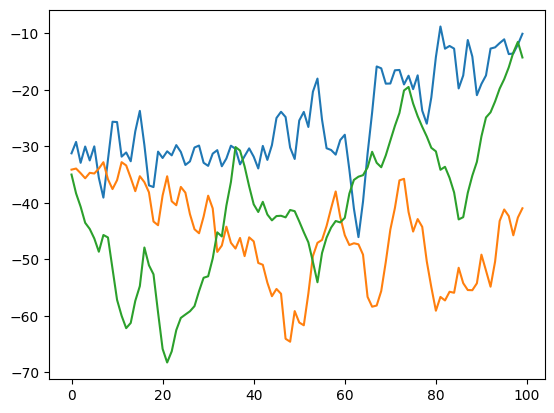

In [60]:
plt.plot(sol.y[2][10000:20000:100])
plt.plot(lya_mid_arima_median['0'].values)
plt.plot(lya_mid_gpt_median['0'].values)


In [61]:
print(calculate_mse(sol.y[2][10000:20000:100],lya_mid_gpt_median['0'].values))
print(calculate_mse(sol.y[2][10000:20000:100],lya_mid_arima_median['0'].values))

326.5744110412697
587.0416049138474


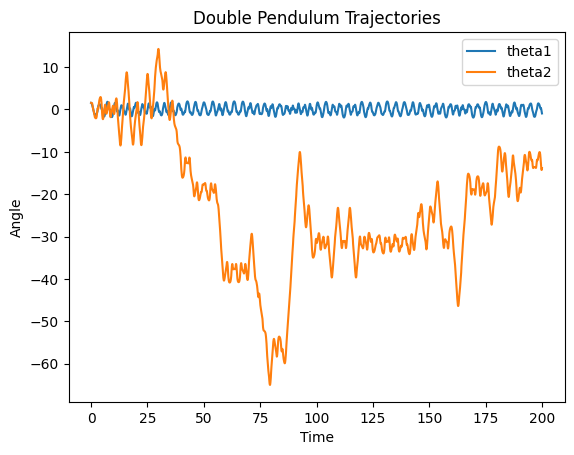

In [52]:
m1 = 1.0  # Mass of pendulum 1
m2 = 5.0  # Mass of pendulum 2
l1 = 1.0  # Length of pendulum 1
l2 = 1.0  # Length of pendulum 2

l1 = 2.0  # Length of pendulum 1
l2 = 1.0  # Length of pendulum 2
m1 = 1.0  # Mass of pendulum 1
m2 = 2.0  # Mass of pendulum 2

g = 9.81  # Acceleration due to gravity

# Initial conditions: [theta1, omega1, theta2, omega2]
y0 = [np.pi / 2, 0, np.pi / 2, 0]  

# Time span
t_span = (0, 200)  

# Solve the differential equations
sol = solve_ivp(double_pendulum, t_span, y0, args=(l1, l2, m1, m2, g), max_step=0.01)

# Plot the results
plt.plot(sol.t, sol.y[0], label='theta1')
plt.plot(sol.t, sol.y[2], label='theta2')
plt.xlabel('Time')
plt.ylabel('Angle')
plt.title('Double Pendulum Trajectories')
plt.legend()
plt.show()

In [62]:

lya_qp_arima_median = csv_to_dataframe("./raunak_results/lya_qp_arima_median.csv")

lya_qp_gpt_median = csv_to_dataframe("./raunak_results/lya_qp_gpt_median.csv")

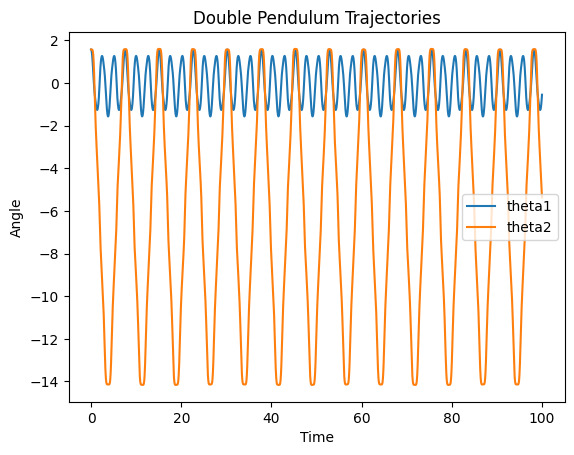

In [63]:
m1 = 5.0  # Mass of pendulum 1
m2 = 1.0  # Mass of pendulum 2
l1 = 1.0  # Length of pendulum 1
l2 = 1.0  # Length of pendulum 2
g = 9.81  # Acceleration due to gravity

# Initial conditions: [theta1, omega1, theta2, omega2]
y0 = [np.pi / 2, 0, np.pi / 2, 0]  

# Time span
t_span = (0, 100)  

# Solve the differential equations
sol_qp = solve_ivp(double_pendulum, t_span, y0, args=(l1, l2, m1, m2, g), max_step=0.01)

# Plot the results
plt.plot(sol_qp.t, sol_qp.y[0], label='theta1')
plt.plot(sol_qp.t, sol_qp.y[2], label='theta2')
plt.xlabel('Time')
plt.ylabel('Angle')
plt.title('Double Pendulum Trajectories')
plt.legend()
plt.show()

In [64]:
train_qp_lya = sol_qp.y[1][0:5000:50]
test_qp_lya = sol_qp.y[1][5000:10000:50]

(100,)

In [67]:
print(calculate_mse(test_qp_lya,lya_qp_gpt_median['0'].values))
print(calculate_mse(test_qp_lya,lya_qp_arima_median['0'].values))

11.414557037960362
6.709176696475638


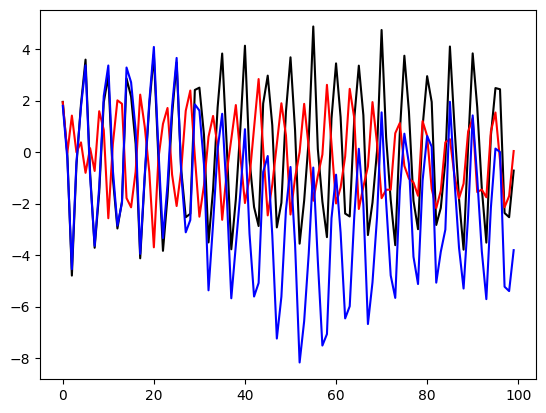

In [68]:
plt.plot(test_qp_lya,'k')
plt.plot(lya_qp_gpt_median['0'].values,'r')
plt.plot(lya_qp_arima_median['0'].values,'b')

### analyzing data from chandra

In [76]:
sine_ft = csv_to_dataframe('./fine_tuned_results/sinetest1_preds.csv')
calculate_mse(sine_ft['true'].values ,   sine_ft['preds'].values    )                   

0.20958876651463393

In [84]:
sine_ft2 = csv_to_dataframe('./fine_tuned_results/sintest2_preds.csv')
calculate_mse(sine_ft2['true'].values ,   sine_ft2['preds'].values    )              

0.07232805246726728

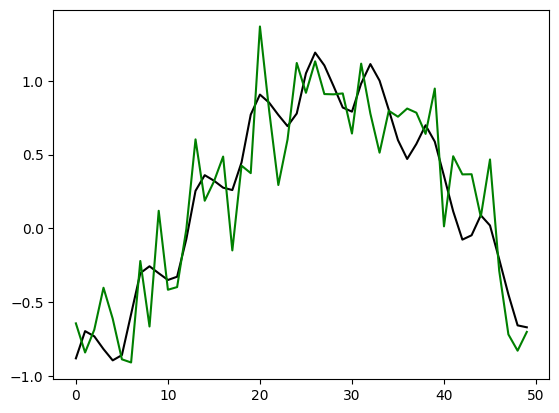

In [86]:
plt.plot(sine_ft2['true'].values,'k')
plt.plot(sine_ft2['preds'].values,'g')

In [88]:
ar3 = csv_to_dataframe('./fine_tuned_results/artest3_preds.csv')
calculate_mse(ar3['true'].values ,   ar3['preds'].values    )              

2.942647099144011